# Блок 2. Простые визуализации с Matplotlib > Шаг 1. Постановка задачи

ПОСТАНОВКА ЗАДАЧИ
Изучение визуализаций мы начнем с одного из самых частых кейсов, с которым сталкиваются аналитики: построим гистограмму распределения значений столбца датафрейма. Т. е., если в столбце встречаются, например, названия кампаний, то необходимо посчитать, сколько раз каждое название встретилось в датафрейме, и нарисовать столбчатую диаграмму.

Упражнение

Освежим в памяти распределения: как выглядит распределение выпадения орла и решки в эксперименте по подбрасыванию монетки?

 комбинаций выпадения четыре, поэтому будет четыре столбика  
 
 стандартный 'колокол' нормального распределения  
 
 два столбика, каждый с вероятностью 50%

### Шаг 2. Данные о кампаниях

Будем использовать знакомый нам датасет с рекламными кампаниями. Загрузим его в датафрейм:

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('ad_campaigns_stats.csv')
data.head()

,group,phrase,effect,ad_id,title,text,link,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,9cc0c5f6ca


### Упражнение для самопроверки

Сначала нам необходимо получить топ самых 'популярных' кампаний. Т. е. посчитать, сколько раз каждая кампания из столбца campaign упоминается в датафрейме. С помощью какого из перечисленных методов это можно посчитать?

 len  sum  value_counts  mean

### Шаг 3. Самые частые кампании

В итоге мы хотим построить распределение для ТОП-5 самых часто встречающихся названий кампаний. Давайте сначала узнаем, что это за кампании, а потом отфильтруем датафрейм по этим названиям. Итак, посмотрим ТОП-5 кампаний в нашем датафрейме:

In [6]:
data.campaign.shape

(2159,)

In [4]:
data.campaign.value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [5]:
# Названия кампаний теперь в индексе полученного датафрейма. Извлечем индекс, используя метод с простым названием index:

data.campaign.value_counts().index

Index(['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a',
       '7388fb4c7b', 'be97523396', '8d3a748298', 'acc3077e55', '718ce6a065',
       ...
       'e2e45b2b2a', '5a7508fa8d', 'd5b16c7769', 'eb577faed1', '63153306ff',
       '7b17b2d188', 'b3f52e6f64', 'da872d1fb4', 'a117c5fc1b', 'f80e902d76'],
      dtype='object', length=115)

In [7]:
# Наконец, получим ТОП-5 самых часто встречающихся в датафрейме кампаний:

most_popular_campaigns = data.campaign.value_counts().index[:5].tolist()
most_popular_campaigns

['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d', 'e90f4db55a']

### Упражнение

Получите последние 9 кампаний в этом списке и отсортируйте их названия в алфавитном порядке.

Какая кампания будет стоять на предпоследнем месте в этом списке?

In [10]:
less_popular_campaigns = data.campaign.value_counts().index[:].tolist()
less_popular_campaigns

['7f35591a28',
 '8e77a0e565',
 '2cc2e7d770',
 'f6d2ae1e3d',
 'e90f4db55a',
 '7388fb4c7b',
 'be97523396',
 '8d3a748298',
 'acc3077e55',
 '718ce6a065',
 '90299cb806',
 '9cc20f7a67',
 '56f3d9eaff',
 'd96029561c',
 '706fcb19c3',
 '6770528fff',
 'f0079349af',
 '942cf4ac20',
 '88dfb2a17b',
 '55188f1274',
 '6bdff94e84',
 '8efe80b27c',
 'edb6a77e3b',
 '777160ba51',
 'c0c9fe22b7',
 '48ef008dae',
 '9cc0c5f6ca',
 '9d35dc6a56',
 '11d5b8b473',
 '1849dc35cf',
 '2db1121377',
 'c2e4dcddaf',
 '218404d350',
 'e7b94d5bd9',
 '1176612405',
 '645c634357',
 'fbed7afb58',
 'a1c0555361',
 '9bf072c32b',
 '5680da7bdf',
 'd0712ff587',
 '691d220f7d',
 '1a39ecc6ce',
 '3157b77d24',
 '9ee3e2c876',
 'bd64204705',
 '10f0dbeae4',
 'adbedfa534',
 '8461c519ee',
 '3cba0fca70',
 'a5444a2280',
 'f1941889d7',
 '41af22f2cc',
 '6e82234792',
 '92de552c53',
 '6e4f6bfa59',
 '9912b25e89',
 'bcc95186aa',
 '28d8dca4df',
 '7c089a3059',
 '08cdcb57a3',
 '034ada41b6',
 '172c17eaba',
 'a825749b87',
 '6e8f620704',
 '5db8565897',
 'c189a246

In [18]:
less_popular_campaigns = data.campaign.value_counts().index[-9:].tolist()
# less_popular_campaigns
bd = sorted(less_popular_campaigns)
bd

['5a7508fa8d',
 '63153306ff',
 '7b17b2d188',
 'a117c5fc1b',
 'b3f52e6f64',
 'd5b16c7769',
 'da872d1fb4',
 'eb577faed1',
 'f80e902d76']

### Шаг 4. Фильтруем датафрейм

Перед тем, как заняться визуализацией распределения, для простоты отфильтруем исходный датафрейм по ТОП-5 кампаний (уберем лишние строки):

Проверим, что все отфильтровалось, как мы ожидаем:

In [20]:
data = data[data['campaign'].isin(most_popular_campaigns)]
data['campaign'].unique()

array(['7f35591a28', '8e77a0e565', '2cc2e7d770', 'f6d2ae1e3d',
       'e90f4db55a'], dtype=object)

Отлично, уникальных кампаний в датафрейме осталось только 5! Продолжим!

### Шаг 5. Построение распределения

Остался последний шаг — построить и нарисовать распределение. На самом деле, это будет самым простым шагом, т. к. в Pandas для создания любых графиков есть метод с коротким названием plot. Перед тем, как рисовать графики, надо один раз выполнить следующую команду. Она позволяет отображать графики прямо в браузере.

In [22]:
%matplotlib inline

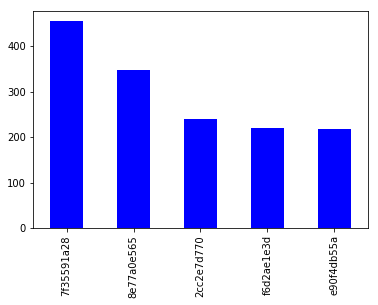

In [23]:
data['campaign'].value_counts().plot(kind = 'bar', color = 'blue')

Собственно, это все, что нужно. Без процедуры подготовки данных построение распределения требует одну строчку кода!

У метода plot есть несколько параметров, которые помогают настраивать внешний вид графика. Об этом можно почитать в документации метода (http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). А мы продолжим с более сложными визуализациями.

# Блок 3. Оформление графиков в Matplotlib > Шаг 1. Данные по продажам

In [24]:
#В этом блоке мы посмотрим, как изменять форматирование элементов графиков в Matplotlib. 
#Будем использовать данные по продажам за последние 3 года sales_data.csv. Посмотрим, что есть в файле:

data = pd.read_csv('sales_data.csv', sep=';')
data.head()

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600


### Упражнение

В наших файлах уже изначально есть заголовок с названиями столбцов. Какой параметр пришлось бы использовать для названия столбцов, если бы заголовка в данных не было?

 encoding  header  names

### Шаг 2. Визуализация год к году

Наша задача — отобразить продажи за три последних года на оси месяцев от 1 до 12. Для этого мы будем использовать метод pyplot, с помощью которого последовательно несколькими командами добавим необходимые данные на итоговый график.

Для краткости импортируем библиотеку следующим образом:

In [25]:
import matplotlib.pyplot as plt

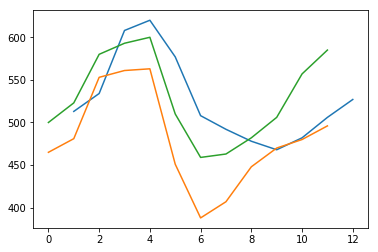

In [26]:
# Добавляем нужные данные тремя командами (ось X задаем в первой команде, в остальных добавляем данные 
# по оси Y и получаем графики):

plt.plot(data['month'], data['2016'])
plt.plot(data['2017'])
plt.plot(data['2018'])

### Шаг 3. Изменение типов линий
Метод plot имеет множество параметров для придания графикам нужного вида. Например, можем добавить маркеры на график 2016 года:

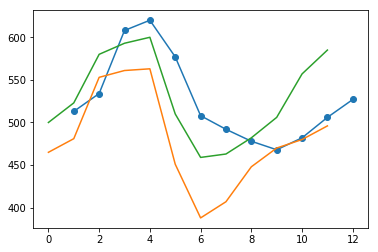

In [27]:
plt.plot(data['month'], data['2016'], marker='o')
plt.plot(data['2017'])
plt.plot(data['2018'])

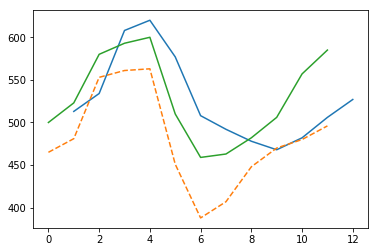

In [28]:
# Или изменить тип линии у графика 2017 года:

plt.plot(data['month'], data['2016'])
plt.plot(data['2017'], linestyle='dashed')
plt.plot(data['2018'])

### УПРАЖНЕНИЕ (БЕЗ ПРОВЕРКИ)

Сделайте толщину графика 2018 года больше с помощью параметра linewidth.

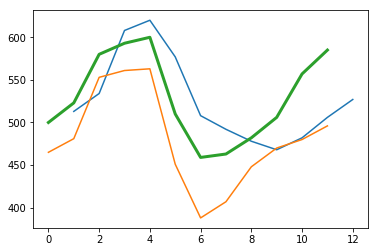

In [31]:
plt.plot(data['month'], data['2016'])
plt.plot(data['2017'])
plt.plot(data['2018'], linewidth=3.0)

### Шаг 4. Добавление легенды

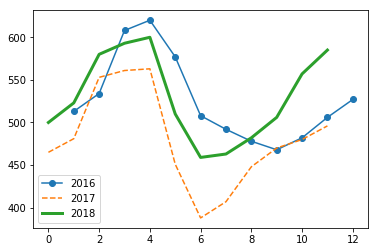

In [32]:
# Чтобы точно понимать соответствие цветов линий и годов, добавим легенду на график:

plt.plot(data['month'], data['2016'], marker='o')
plt.plot(data['2017'], linestyle='dashed')
plt.plot(data['2018'], linewidth=3)
plt.legend()

Для изменения названий в легенде надо переименовать названия столбцов датафрейма.

Метод plot имеет много параметров, ознакомиться с которыми можно в документации (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

# Блок 4. Seaborn для продвинутых визуализаций > Шаг 1. Данные и задача

### ПОСТАНОВКА ЗАДАЧИ

Python-библиотеки для визуализаций позволяют не только рисовать простые графики и распределения, но и быстро получать наглядные отображения структуры данных. В этом блоке мы вспомним понятие корреляции и визуализируем так называемую матрицу корреляций между признаками.

Это популярный прием в машинном обучении для быстрого выделения зависимых признаков в датасете.

Для визуализаций будем использовать библиотеку Seaborn. Насколько сложные графики можно сделать с помощью этой библиотеки, вы можете посмотреть в галерее Seaborn.

### УПРАЖНЕНИЕ

Даны значения двух переменных, зависимость которых отображена на графике:

Какой коэффициент корреляции между этими переменными?

### Шаг 2. Данные

Мы будем использовать набор признаков из файла correlation.tsv. Это статистика потребления видеоконтента по 10 различным характеристикам для набора групп пользователей: время просмотра по категориям, соцдем характеристики, просмотр рекомендованных видео и т. д. Довольно часто такая информация шифруется в набор признаков p1, p2... p10. Если признаки хорошо коррелируют между собой, то, возможно, эти пары не следует использовать в одной линейной модели. 

Загрузим их в датафрейм:

In [33]:
import pandas as pd

In [34]:
features = pd.read_csv('correlation.tsv', sep='\t')
features.head()

,month,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,2018-01-01,7,185,385,-129,2260,98,245,1250,214,415
1,2018-01-02,7,108,79,-142,3280,113,149,1161,123,376
2,2018-01-03,8,214,80,-151,410,141,297,1315,146,397
3,2018-01-04,8,81,372,-160,1289,46,447,1389,200,253
4,2018-01-05,9,113,144,-173,1297,67,413,938,129,489


In [35]:
#Для исследования зависимостей между признаками уберем из датафрейма столбец month:

features.drop('month', axis=1, inplace=True)
features.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
0,7,185,385,-129,2260,98,245,1250,214,415
1,7,108,79,-142,3280,113,149,1161,123,376
2,8,214,80,-151,410,141,297,1315,146,397
3,8,81,372,-160,1289,46,447,1389,200,253
4,9,113,144,-173,1297,67,413,938,129,489


### Упражнение

Зачем в методе drop указан параметр axis?

 для краткости, чтобы не писать features = features.drop(...)  указывает, что удаление происходит по строкам  указывает, что удаление происходит по столбцам  не влияет ни на что в этом случае

### Шаг 3. Матрица корреляций

Для того, чтобы узнать коэффициент корреляции между всеми признаками, построим матрицу корреляций. Для этого воспользуемся методом corr. Достаточно одной строчки:

In [36]:
features.corr()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10
p1,1.000000,0.249489,0.619757,-0.999524,0.587943,0.433063,0.577808,0.967058,0.466873,0.945575
p2,0.249489,1.000000,0.113910,-0.248287,0.141641,0.126832,0.078979,0.262559,0.012126,0.256899
p3,0.619757,0.113910,1.000000,-0.620411,0.309102,0.320015,0.382502,0.607829,0.249586,0.606912
p4,-0.999524,-0.248287,-0.620411,1.000000,-0.586430,-0.432828,-0.579732,-0.968715,-0.463727,-0.945416
p5,0.587943,0.141641,0.309102,-0.586430,1.000000,0.155944,0.297214,0.571159,0.269545,0.537990
p6,0.433063,0.126832,0.320015,-0.432828,0.155944,1.000000,0.313817,0.411173,0.255341,0.422155
p7,0.577808,0.078979,0.382502,-0.579732,0.297214,0.313817,1.000000,0.573135,0.286736,0.559694
p8,0.967058,0.262559,0.607829,-0.968715,0.571159,0.411173,0.573135,1.000000,0.433534,0.911911
p9,0.466873,0.012126,0.249586,-0.463727,0.269545,0.255341,0.286736,0.433534,1.000000,0.453852
p10,0.945575,0.256899,0.606912,-0.945416,0.537990,0.422155,0.559694,0.911911,0.453852,1.000000


### Упражнение

Величины A и B имеют коэффициент корреляции 0.99. Верно ли, что величина B определяется изменениями A?

 при такой высокой корреляции это верно  это неверно в общем случае  это верно, если величины имеют нормальное распределение

### Шаг 4. Корреляция и зависимость

Сделаем короткое отступление. Тема корреляции и зависимости переменных очень важна, т. к. часто это приводит к неверным выводам. К сожалению, в общем случае только по значению коэффициента корреляции между величинами A и B мы ничего не можем сказать о зависимости B от A хотя бы потому, что, если корреляция между A и B равна, например, 0.9, то и корреляция между B и A тоже равна 0.9. Рассмотрим три примера, когда коэффициент корреляции вводит нас в заблуждение:

1. Количество пожарных машин в регионе коррелирует с количеством пожаров. Однако глупо будет утверждать, что количество машин определяет количество пожаров. В данном случае мы путаем причину и следствие.

2. Интеллект школьника коррелирует с размером его обуви. Здесь правильнее сказать, что интеллект и размер обуви зависят от возраста. Т. е. мы упускаем влияние третьей переменной — возраста.

3. Невероятно, но факт: показатель количества разводов в штате Мэн коррелирует с потреблением маргарина на душу населения с коэффициентом 99.26%. Это просто совпадение. Вы можете найти много других примеров мистических корреляций на сайте www.tylervigen.com.

### Шаг 5. Визуализация матрицы 

Читать матрицу корреляций для десяти признаков неудобно. Давайте визуализируем нашу таблицу с помощью heatmap. Т. е. в зависимости от величины корреляции необходимо давать ячейке определенную градацию цвета. Для этого импортируем необходимые библиотеки:

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

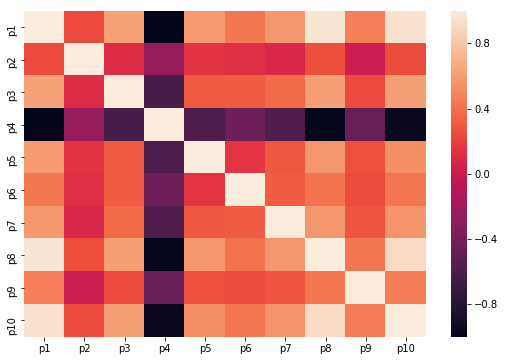

In [38]:
# Создаем пространство для визуализации удобного нам размера и рисуем heatmap для датафрейма features:

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(features.corr())

### Шаг 6. Добавляем формат heatmap

Укажем детали нашей визуализации, чтобы она стала более наглядной:

1. Добавим подписи данных с помощью параметра annot=True.

2. Уточним формат подписи fmt='.1f'.

3. Выберем другую цветовую палитру с помощью параметра cmap. Палитры можно выбрать здесь (http://seaborn.pydata.org/tutorial/color_palettes.html).

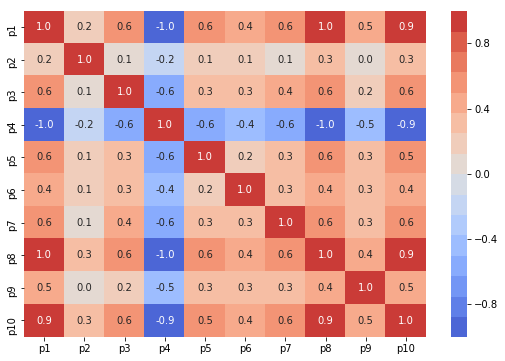

In [39]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(features.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 16))

Теперь ясно видно, какие пары признаков сильно коррелируют: темно-красные и синие.

### О библиотеке

Библиотека Plotly является коммерческим продуктом (но можно использовать бесплатную версию), которая позволяет делать сложные визуализации с элементами управления. Например, отображать 3D диаграмму с выбором опций:

В этом блоке мы пройдем первый этап знакомства с этой библиотекой на примере таблиц. А при необходимости вы сможете освоить необходимые визуализации под свои рабочие задачи.

### Шаг 1. Установка plotly

Библиотека plotly не входит в стандартный набор модулей Anaconda, поэтому ее надо установить. Для этого сделайте следующее:

1. Откройте Anaconda Navigator и перейдите на вкладку Environments.
2. Ищем библиотеку plotly среди всех, выбираем ее и устанавливаем с помощью кнопки Apply в правом нижнем углу.

pip install plotly

In [41]:
#Проверяем, что библиотека установлена: открываем новый jupyter notebook и импортируем.

import plotly

### Шаг 2. Токен для использования plotly

Plotly является коммерческим продуктом, поэтому для контроля использования (в том числе бесплатного) необходимо к каждому запросу добавлять авторизационный токен. Для его получения делаем следующее:

1. Регистрируемся на plot.ly.

2. После прохождения регистрации заходим в настройки API  и генерим токен для запросов:

### Шаг 3. Подготовка данных

Попробуем визуализировать таблицу с помощью plotly. Возьмем знакомый нам файл sales_data.csv.

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv('sales_data.csv', sep=';')
data.head()

,month,2016,2017,2018
0,1,513,465,500
1,2,534,481,523
2,3,608,553,580
3,4,620,561,593
4,5,577,563,600


In [44]:
# Импортируем библиотеку plotly с логином и ключом к API:

import plotly
plotly.tools.set_credentials_file(username='Bukovka', api_key='GjJm5fGzazwcGuiqvBD6')

### Шаг 4. Визуализация таблицы

В галерее примеров (https://plot.ly/python/) можно выбрать визуализацию любой сложности. Попробуем применить форматирование к нашему датафрейму:

Параметр fill указывает на цвет заливки, align — выравнивание столбцов. 

In [45]:
import plotly.plotly as py
import plotly.graph_objs as go
trace = go.Table(
    header=dict(values=list(data.columns),
                fill = dict(color='#C2D4FF'),
                align = ['left', 'right', 'right', 'right']),
    cells=dict(values=[data['month'], data['2016'], data['2017'], data['2018']],
               fill = dict(color='#F5F8FF'),
               align = ['left'] + ['right']*3))
py.iplot([trace], filename = 'pandas_table')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Bukovka/0 or inside your plot.ly account where it is named 'pandas_table'


C:\Users\shchepkina-ev\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Кликнув по кнопке Edit chart в правом нижнем углу, можно продолжить настройку визуализации таблицы в отдельном окне.